In [2]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [3]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("val_dataset", {}, '/home/road2022/parking_project/detectron2/val.json', '/home/road2022/parking_project/detectron2/image')
test_metadata = MetadataCatalog.get("val_dataset")

In [4]:
cfg = get_cfg()
cfg.merge_from_file("/home/road2022/parking_project/detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.WEIGHTS = "/home/road2022/parking_project/detectron2/detection.pth"  # 모델 경로
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 17
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7

In [5]:
print(test_metadata.thing_classes)

AttributeError: Attribute 'thing_classes' does not exist in the metadata of dataset 'val_dataset'. Available keys are dict_keys(['name', 'json_file', 'image_root', 'evaluator_type']).

[09/04 11:35:01 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /home/road2022/parking_project/detectron2/detection.pth ...


/home/road2022/.local/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


0.13381075859069824초 걸렸습니다.


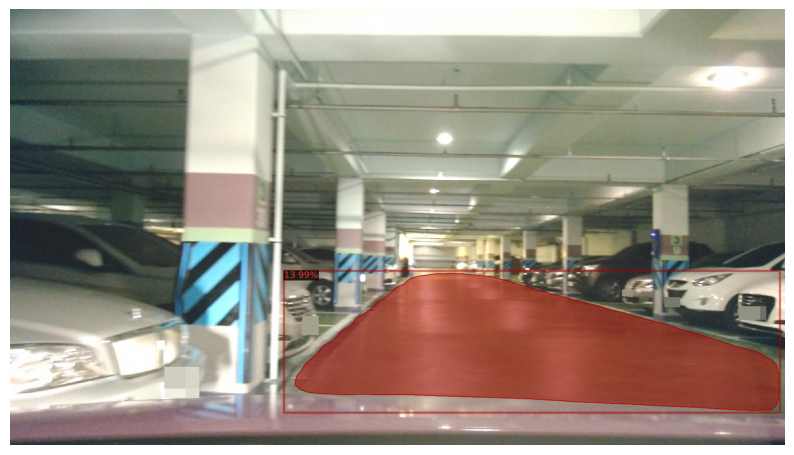

Object 0 mask coordinates:
[[ 654 1082]
 [ 654 1083]
 [ 654 1084]
 ...
 [ 994 1854]
 [ 994 1855]
 [ 994 1856]]
0.09131717681884766초 걸렸습니다.


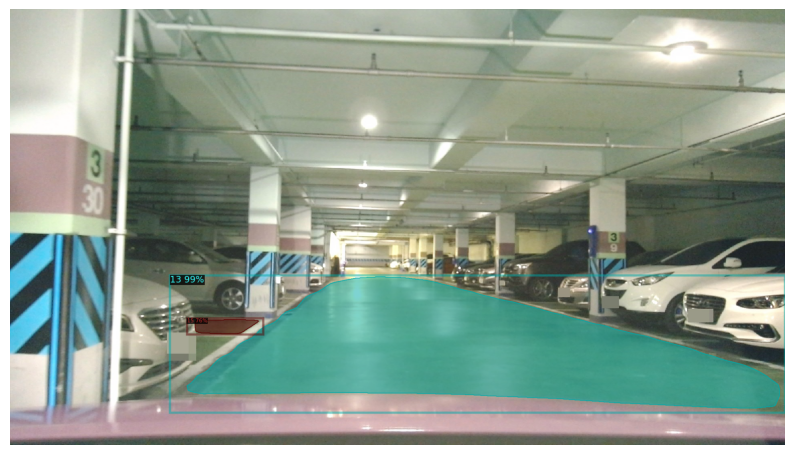

Object 0 mask coordinates:
[[ 663  905]
 [ 663  906]
 [ 663  907]
 ...
 [ 988 1848]
 [ 988 1849]
 [ 988 1850]]
Object 1 mask coordinates:
[[769 530]
 [769 531]
 [769 532]
 ...
 [804 561]
 [804 562]
 [804 563]]
0.08715295791625977초 걸렸습니다.


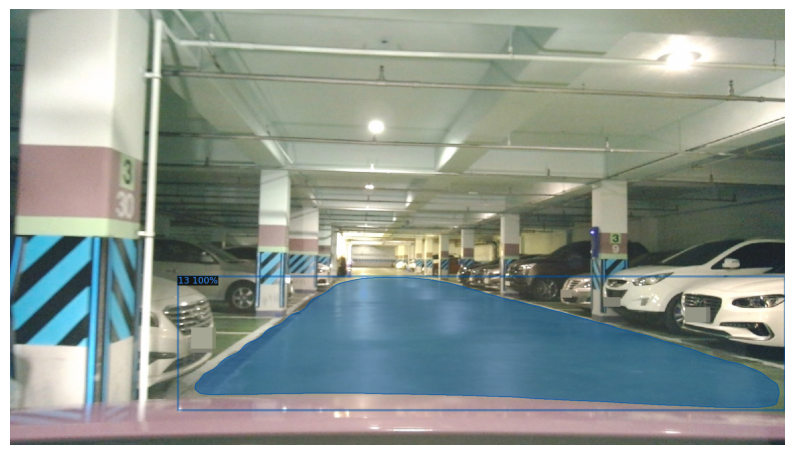

Object 0 mask coordinates:
[[ 664  923]
 [ 664  924]
 [ 664  925]
 ...
 [ 987 1850]
 [ 987 1851]
 [ 987 1852]]
0.08977818489074707초 걸렸습니다.


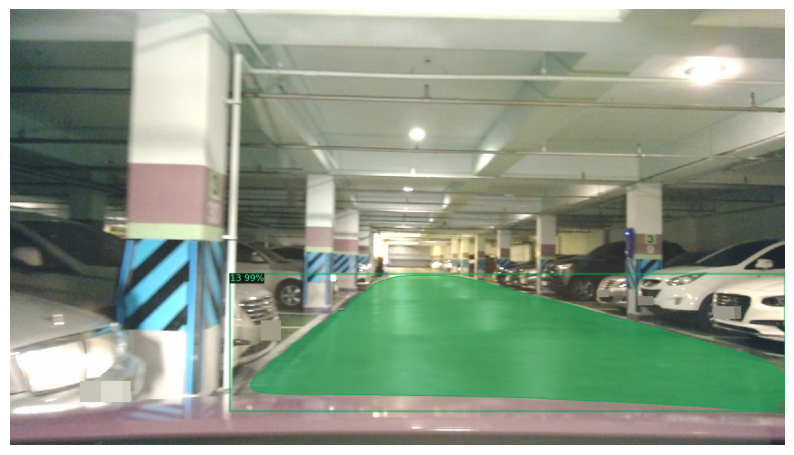

Object 0 mask coordinates:
[[ 659  999]
 [ 659 1000]
 [ 659 1001]
 ...
 [ 990 1871]
 [ 990 1872]
 [ 990 1873]]
0.0890512466430664초 걸렸습니다.


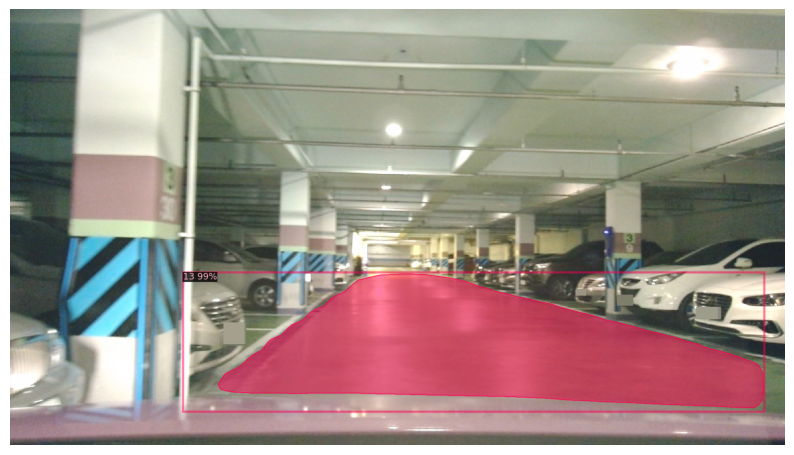

Object 0 mask coordinates:
[[ 656  964]
 [ 656  965]
 [ 656  966]
 ...
 [ 987 1842]
 [ 987 1843]
 [ 988 1842]]
Processed images are saved in /home/road2022/parking_project/detectron2/results


In [4]:
import time
import os
import torch
predictor = DefaultPredictor(cfg)

from detectron2.utils.visualizer import ColorMode
import glob
cnt = 0
for imageName in glob.glob('/home/road2022/parking_project/detectron2/image/*.jpg'): # 이미지 파일 경로
  im = cv2.imread(imageName)
  s_time = time.time()
  outputs = predictor(im)
  print('{}초 걸렸습니다.'.format(time.time()-s_time))
  v = Visualizer(im[:, :, ::-1],
                metadata=test_metadata, 
                scale=0.8
                )
  output_dir = '/home/road2022/parking_project/detectron2/results'
  os.makedirs(output_dir, exist_ok=True)
  instance = outputs["instances"]
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  output_path = os.path.join(output_dir, os.path.basename(imageName))
  cv2.imwrite(output_path, out.get_image()[:, :, ::-1])
  plt.figure(figsize=(10, 10))
  plt.imshow(out.get_image()[:, :, ::-1])
  plt.axis('off')  # 축 숨기기
  plt.show()
  # 인스턴스 예측 정보 가져오기
  instances = outputs["instances"]

  # 클래스 정보 (0부터 시작하는 클래스 인덱스, COCO dataset 기준)
  pred_classes = instances.pred_classes.cpu().numpy()

  # 세그멘테이션 마스크 정보
  pred_masks = instances.pred_masks.cpu()

  # 각 객체의 바운딩 박스 정보
  pred_boxes = instances.pred_boxes.tensor.cpu().numpy()
  for i in range(len(pred_classes)):
    mask = pred_masks[i]
    # 객체의 마스크에서 활성화된 픽셀의 (x, y) 좌표 추출
    coords = torch.nonzero(mask).cpu().numpy()
    print(f"Object {i} mask coordinates:")
    print(coords)

  cnt += 1
  if cnt >= 5:
    break
  


print(f"Processed images are saved in {output_dir}")